In [8]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline
from IPython.display import clear_output
__file__ = "preprocessing.ipynb"
dirname = os.path.dirname(os.path.abspath(os.path.dirname(__file__)))
sys.path.append(dirname)

In [9]:
'''
filelist = glob.glob(dirname + "/Data/*/*.xlsx", recursive= True)
for file in filelist:
    xlsx = pd.read_excel(file)
    xlsx.to_csv(dirname + "/Data/csv_folder/" + file.split("/")[-1].split(".")[0]+".csv")
'''

'\nfilelist = glob.glob(dirname + "/Data/*/*.xlsx", recursive= True)\nfor file in filelist:\n    xlsx = pd.read_excel(file)\n    xlsx.to_csv(dirname + "/Data/csv_folder/" + file.split("/")[-1].split(".")[0]+".csv")\n'

In [10]:
csvlist= glob.glob(dirname + "/Data/*/*.csv", recursive= True)

In [14]:
class_df = pd.DataFrame(columns=["대분류", "중분류", "소분류"])
for file in csvlist:
    data = pd.read_csv(file)
    class_df = pd.concat([class_df, data.loc[:,["대분류", "중분류", "소분류"]]])
    class_df.drop_duplicates(inplace= True)
    class_df.reset_index(inplace = True, drop= True)

/home/shinjk1156/.conda/envs/jk_lab/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
xlsx_map_df = pd.read_excel( dirname+ "/Data/" + "도면분류_구역_대분류_소분류_물품.xlsx")

In [ ]:
xlsx_map_df.to_csv( dirname+ "/Data/" + "base_mapping_file.csv", index = False)

In [15]:
mapping_df  = pd.read_csv(dirname+ "/Data/" + "base_mapping_file.csv")

In [16]:
mapping_df.head()

,통로구분,대분류코드,대분류,중분류,소분류,row,column
0,0,1,음료,음료기획,음료세트,8,1
1,0,2,유제품,유음료,두유,8,2
2,0,3,양곡,미곡류,국산쌀,8,3
3,0,3,양곡,미곡류,찹쌀,8,4
4,0,3,양곡,미곡류,잡곡기타,8,5


In [17]:
map_arr = np.ones((30,38,3))

In [18]:
#같은 위치에 서로 같은 대분류 배치하지 않기! 대분류 코드가 다른데, 대중소 분류가 같은 놈들 찾기 
temp_df = mapping_df.loc[:,["대분류코드", "대분류", "중분류", "소분류"]]
temp_df.drop_duplicates(inplace = True)
temp_df.reset_index(inplace = True, drop = True)

In [19]:
color_list = []
for i in range(100):
    color = list(np.random.choice(range(256), size=3))
    if color in color_list:
        pass
    else:
        color_list.append(color)

In [20]:
for x, y, key1, key2, name in zip(mapping_df.row, mapping_df.column, mapping_df.통로구분, mapping_df.대분류코드, mapping_df.대분류):
    if name == "벽":
        map_arr[x][y][0] = 0.1
        map_arr[x][y][1] = 0.1
        map_arr[x][y][2] = 0.1
    else:
        map_arr[x][y][0] = color_list[key2][0]/255
        map_arr[x][y][1] = color_list[key2][1]/255
        map_arr[x][y][2] = color_list[key2][2]/255

In [69]:
c_path = [(26,2),(26,3),(27,4),(28,5),(28,6),(28,7),(28,8),(27,9),(26,10),(25,10),(24,10),(23,9),(22,9),(21,9),(20,9),(20,10),(20,11),(20,12),(20,13),(20,14),(20,15),(20,16),(20,17),(20,18),(20,19),(20,20),(19,20),(18,20),(17,20),(16,20),(15,20),(14,20),(13,20),(12,20),(11,20),(11,19),(11,18),(11,17),(11,16),(11,15),(11,14),(11,13),(11,12),(11,11),(11,10),(11,9),(11,8),(10,7),(9,6),(9,5),(9,4),(10,3),(11,2),(11,1)]

In [70]:
def customer_path(map_arr):
    for x in range(map_arr.shape[0]):
        for y in range(map_arr.shape[1]):
            if (map_arr[x][y][0] == 1.0) & (map_arr[x][y][1] == 1.0) & (map_arr[x][y][2] == 1.0):
                print(x,y)
            else:
                pass


In [72]:
def plot_customerpath(c_arr):
    x_list = []
    y_list = []
    for x, y in zip(c_arr.T[1], c_arr.T[0]):
        clear_output(True)
        x_list.append(x)
        y_list.append(y)
        fig, ax = plt.subplots(figsize = (19,15))
        ax.imshow(map_arr)
        # draw gridlines
        ax.grid(which='major', axis='both', linestyle='-', linewidth=1, color = "black")
        ax.set_xticks(np.arange(.5, 38, 1))
        ax.set_yticks(np.arange(.5, 30, 1))
        ax.scatter(x_list, y_list, c = "black", marker = "*", s= 100)
        plt.show()

In [71]:
c_arr = np.array(c_path)

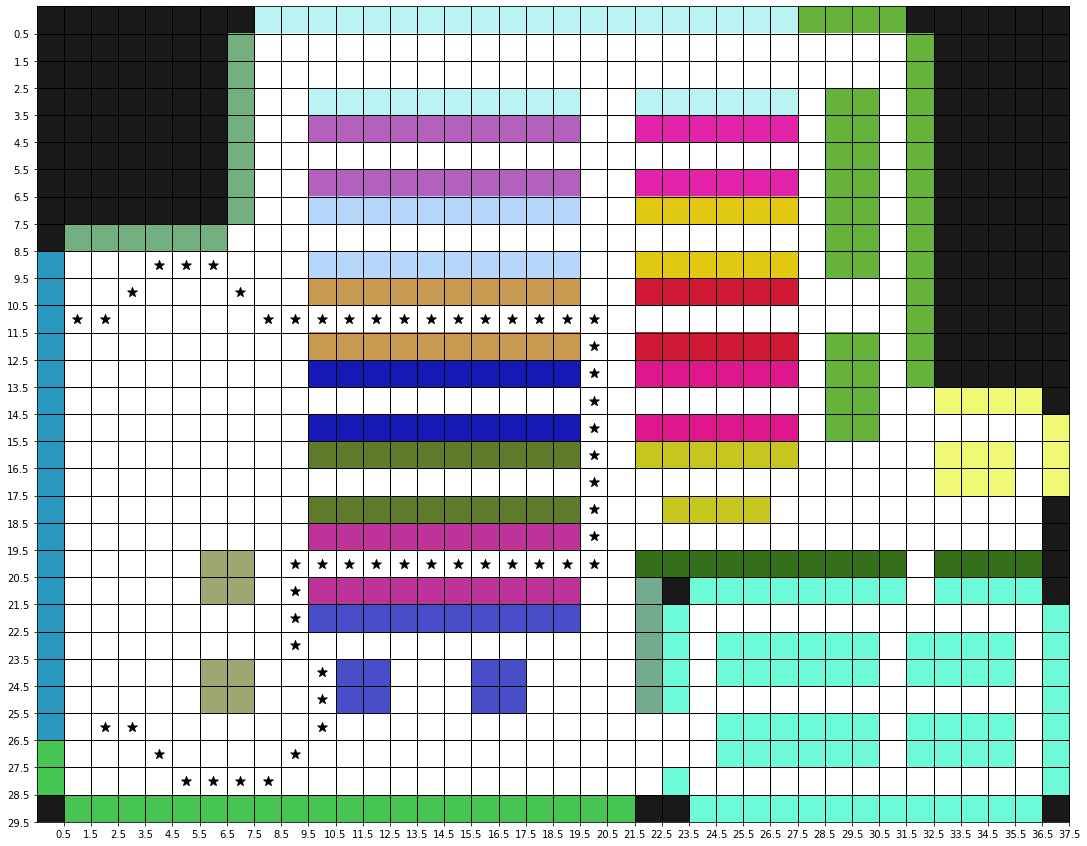

In [73]:
plot_customerpath(c_arr)

In [21]:
np.save(dirname + "/Data/mapping_array_by_md", map_arr)

In [22]:
arr = np.load(dirname + "/Data/mapping_array_by_md.npy")

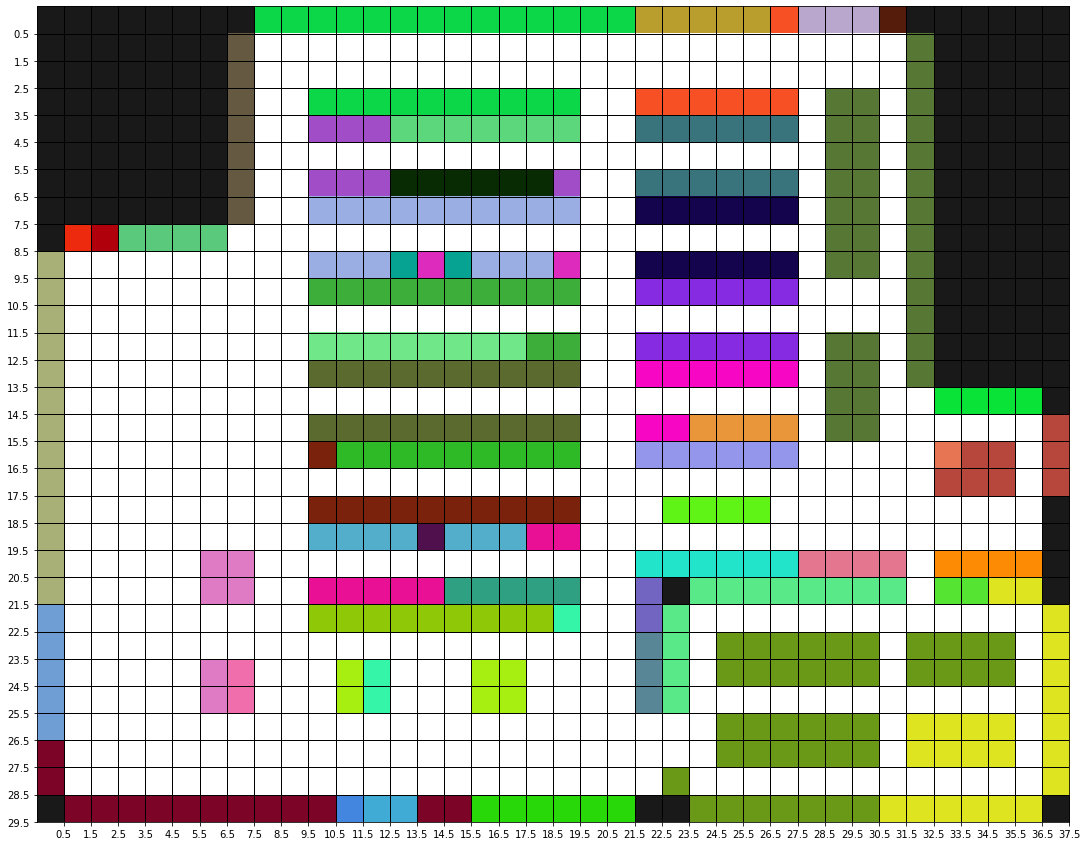

In [24]:
fig, ax = plt.subplots(figsize = (19,15))
ax.imshow(arr)
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', linewidth=1, color = "black")
ax.set_xticks(np.arange(.5, 38, 1))
ax.set_yticks(np.arange(.5, 30, 1))
plt.show()